# Analysis of RTO data

In [1]:
from nbimports import *

In [2]:
import processing
processing = reload(processing)

In [3]:
# filename = "../data/user/data_25042022_170416.csv"
filename = "../data/user/data_26042022_182920.csv"

## all strokes

In [4]:
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']

In [5]:
data_df = processing.format_data(select(data, source='/data'))

In [6]:
data_df.head()

key      t0  ts  stroke_id         x         y         p        x_  \
0  223155_50  223155  50          7  0.108465  0.922634  0.016437 -0.000808   
1  223168_60  223168  60          7  0.107795  0.923251  0.019668 -0.001477   
2  223181_70  223181  70          7  0.107020  0.923929  0.022609 -0.002252   
3  223181_80  223181  80          7  0.106651  0.924164  0.022216 -0.002621   
4  223194_90  223194  90          7  0.105952  0.924211  0.021473 -0.003320   

         y_        p_        x0        y0        p0        x1        y1  \
0  0.000759  0.012175 -0.000011  0.000010  0.000634 -0.000005  0.000004   
1  0.001376  0.015406 -0.000035  0.000032  0.001471 -0.000012  0.000011   
2  0.002054  0.018348 -0.000086  0.000079  0.002857 -0.000027  0.000025   
3  0.002289  0.017955 -0.000183  0.000169  0.004819 -0.000053  0.000049   
4  0.002336  0.017212 -0.000349  0.000322  0.007260 -0.000094  0.000086   

         p1  
0  0.000210  
1  0.000431  
2  0.000760  
3  0.001180  
4  0.001638

<AxesSubplot:>

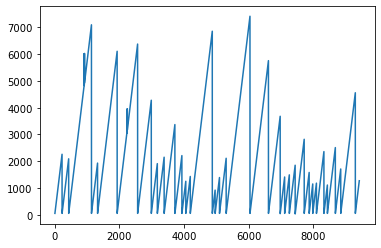

In [7]:
# data['timestamp'].plot()
data_df['ts'].plot()

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='x', ylabel='y'>

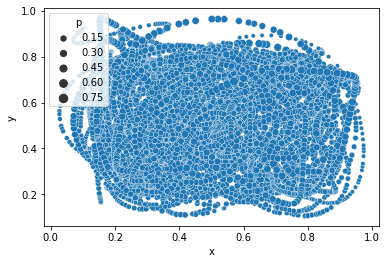

In [9]:
sns.scatterplot(data=data_df, x='x', y='y', size='p')

In [10]:
stroke_id_list = list(set(data_df['stroke_id']))
min(stroke_id_list), max(stroke_id_list)

(7, 41)

<AxesSubplot:xlabel='x', ylabel='y'>

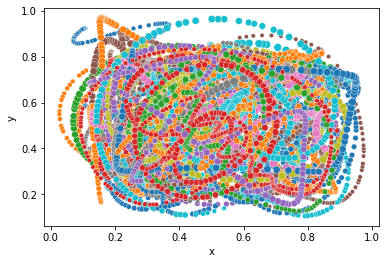

In [11]:
sns.scatterplot(data=data_df, x='x', y='y', size='p', hue='stroke_id', palette='tab10', legend=False)

In [12]:
data.shape

(18815, 2)

In [13]:
import plotly.graph_objs as go

In [14]:
hovertext = np.c_[data_df['stroke_id'].index, data_df['stroke_id'].values].astype(int)

In [15]:
data_df.columns

Index(['key', 't0', 'ts', 'stroke_id', 'x', 'y', 'p', 'x_', 'y_', 'p_', 'x0',
       'y0', 'p0', 'x1', 'y1', 'p1'],
      dtype='object')

<AxesSubplot:>

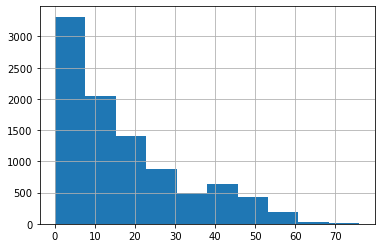

In [16]:
(data_df['p']*100).hist()

In [98]:
import joblib

In [105]:
mms.

array(['x0'], dtype=object)

In [121]:
mms

MinMaxScaler(feature_range=(10, 80))

In [114]:
tmp_json = logistic_regression_to_json(mms)

In [115]:
mms_json = logistic_regression_from_json(tmp_json)

In [118]:
mms_json.transform([[10]])

array([[931.79857668]])

In [119]:
mms.transform([[10]])

array([[931.79857668]])

In [72]:
import sklearn.preprocessing as skprep
mms = skprep.MinMaxScaler(feature_range=(10, 80))
p_scaled = mms.fit_transform(data_df['p'].values.reshape(-1,1)).reshape(-1)

In [73]:
colors = ["rgba"+str(tab10[int(i)%10]+(1,)) for i in data_df['stroke_id']]

In [94]:
dict(color='black')

{'color': 'black'}

In [74]:
import plotly.express as px

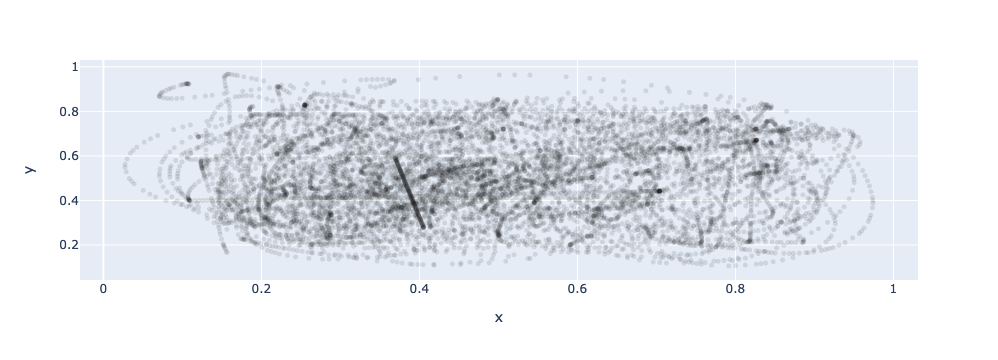

In [92]:
fig = px.scatter(x=data_df['x'], y=data_df['y'], size=p_scaled, labels={})
fig.layout.update(showlegend=False) 
fig.update_traces(marker={'color':'black'}, marker_size=5, opacity=0.1)

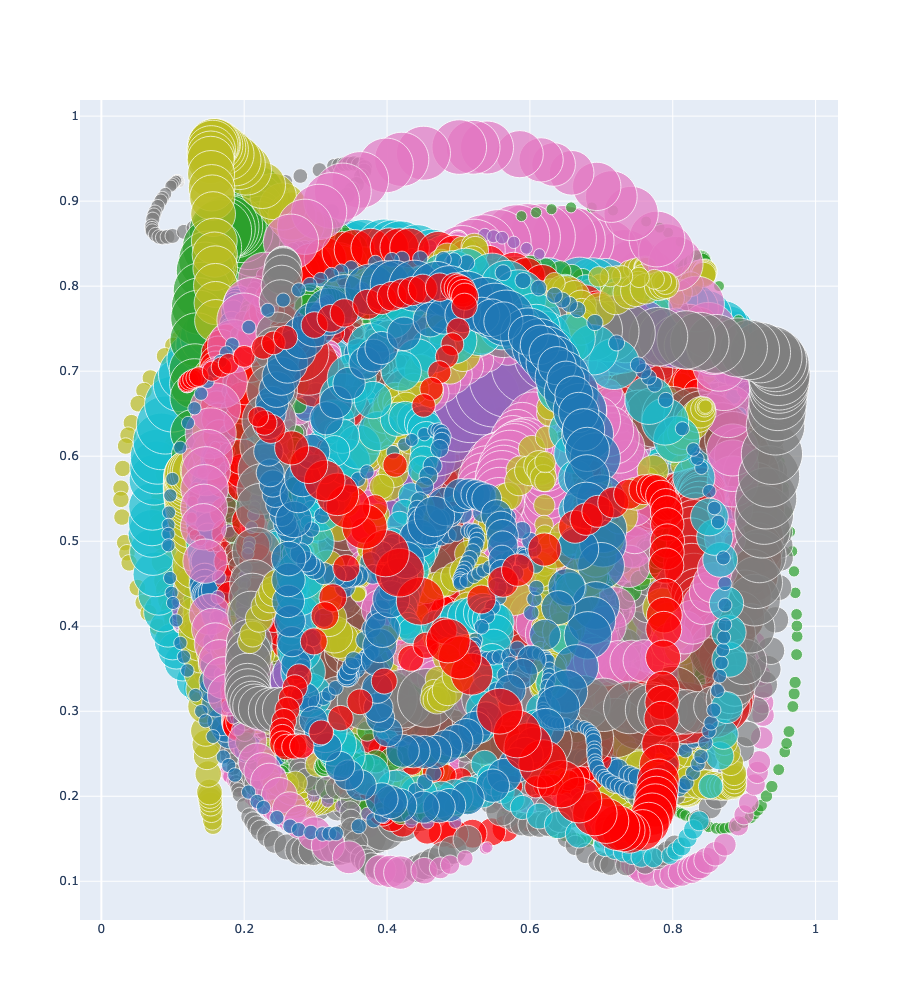

In [174]:
fig = go.Figure()
scatter = go.Scatter(x=data_df['x'], y=data_df['y'], 
                     opacity=1, marker={'size':p_scaled, 'color':colors}, 
                     customdata=hovertext, 
                     hovertemplate='%{customdata[1]}[%{customdata[0]}]',
                     mode='markers',
                    )
fig.add_trace(scatter)
scatter = fig.data[0]

fig.update_layout(
    # autosize=False,
    width=1000,
    height=1000,
)
fig

## features

In [23]:
import processing
processing = reload(processing)

In [24]:
feat_df = processing.format_feat(select(data, source='/feat'))

In [25]:
np.count_nonzero(feat_df.groupby('segment_id').size() < 11)

55

<AxesSubplot:>

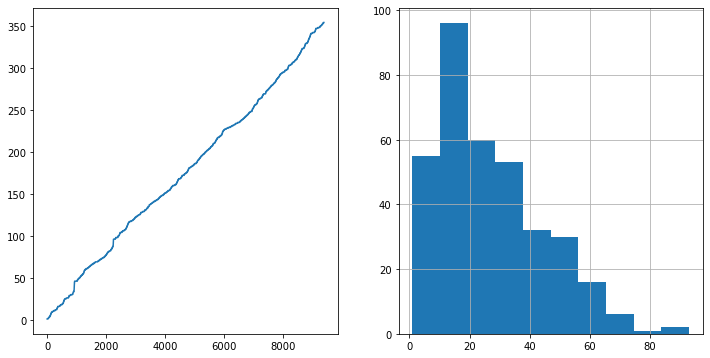

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
feat_df['segment_id'].plot(ax=ax[0])
feat_df.groupby('segment_id').size().hist(ax=ax[1])

The scale of the different features should be comparable for the DTW to take them into account equally. Alternatively, we could compute a Mahalanobis distance from a small batch of data.

<AxesSubplot:>

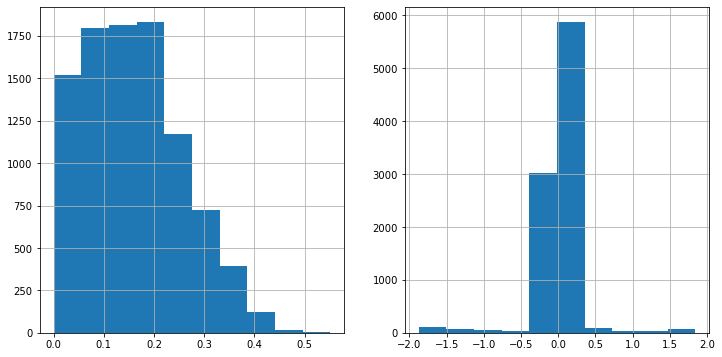

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
feat_df['s'].hist(ax=ax[0])
feat_df['da'].hist(ax=ax[1])

## one stroke

In [21]:
stroke_i = select(data_df, stroke_id=19)

In [22]:
stroke_i.head()

key      t0  ts  stroke_id         x         y         p  \
3718  272926_50  272926  50         19  0.186201  0.301575  0.093409   
3719  272940_60  272940  60         19  0.190601  0.306401  0.113206   
3720  272940_70  272940  70         19  0.200110  0.316406  0.153750   
3721  272956_80  272956  80         19  0.206245  0.322376  0.156946   
3722  272969_90  272969  90         19  0.215098  0.330766  0.162185   

            x_        y_        p_        x0        y0        p0        x1  \
3718  0.003704  0.006134  0.043409  0.000066  0.000134  0.003737  0.000026   
3719  0.008104  0.010960  0.063206  0.000194  0.000380  0.007785  0.000066   
3720  0.017612  0.020966  0.103750  0.000467  0.000876  0.013753  0.000146   
3721  0.023748  0.026936  0.106946  0.000990  0.001748  0.021501  0.000291   
3722  0.032601  0.035325  0.112185  0.001939  0.003162  0.030850  0.000544   

            y1        p1  
3718  0.000052  0.001149  
3719  0.000126  0.002142  
3720  0.000262  0.003475  
3721  0.000487  0.005051  
3722  0.000834  0.006752

### for one segment, get data from strokes

In [28]:
gi = feat_df.groupby('segment_id').get_group(2)

In [29]:
gi = gi.join(data_df.set_index('key'), on='key').copy()

In [30]:
gi.head()

key  segment_id         s        da    min_dtw min_dtw_id      t0  \
29  223450_340           2  0.045155  0.196884  12.308241          0  223450   
30  223471_350           2  0.054368  0.196884  12.308241          0  223471   
31  223471_360           2  0.067727  0.196884  12.308241          0  223471   
32  223471_370           2  0.084164  0.141380  12.308241          0  223471   
33  223500_380           2  0.102374  0.098720  12.308241          0  223500   

     ts  stroke_id         x  ...         p        x_        y_        p_  \
29  340          7  0.152816  ...  0.053282  0.043543 -0.042443  0.049021   
30  350          7  0.176295  ...  0.050525  0.067023 -0.031446  0.046264   
31  360          7  0.186917  ...  0.050092  0.077645 -0.026694  0.045831   
32  370          7  0.197540  ...  0.049659  0.088268 -0.021942  0.045398   
33  380          7  0.210330  ...  0.049796  0.101058 -0.016702  0.045535   

          x0        y0        p0        x1        y1        p1  
29 -0.022866 -0.063933  0.045482  0.003830 -0.002391  0.000668  
30 -0.015405 -0.063695  0.046723  0.005254 -0.001397  0.000871  
31 -0.006258 -0.062036  0.047864  0.006768 -0.000245  0.001004  
32  0.004589 -0.058908  0.048718  0.008353  0.001035  0.001001  
33  0.017055 -0.054376  0.049150  0.009957  0.002381  0.000842  

[5 rows x 21 columns]

In [31]:
gi.columns

Index(['key', 'segment_id', 's', 'da', 'min_dtw', 'min_dtw_id', 't0', 'ts',
       'stroke_id', 'x', 'y', 'p', 'x_', 'y_', 'p_', 'x0', 'y0', 'p0', 'x1',
       'y1', 'p1'],
      dtype='object')

### get all segments from one stroke

In [63]:
stroke_i_feat = stroke_i.join(feat_df.set_index('key'), on='key').dropna()

In [64]:
stroke_i_feat.head()

key      t0  ts  stroke_id         x         y         p  \
3718  272926_50  272926  50         19  0.186201  0.301575  0.093409   
3719  272940_60  272940  60         19  0.190601  0.306401  0.113206   
3720  272940_70  272940  70         19  0.200110  0.316406  0.153750   
3721  272956_80  272956  80         19  0.206245  0.322376  0.156946   
3722  272969_90  272969  90         19  0.215098  0.330766  0.162185   

            x_        y_        p_  ...        y0        p0        x1  \
3718  0.003704  0.006134  0.043409  ...  0.000134  0.003737  0.000026   
3719  0.008104  0.010960  0.063206  ...  0.000380  0.007785  0.000066   
3720  0.017612  0.020966  0.103750  ...  0.000876  0.013753  0.000146   
3721  0.023748  0.026936  0.106946  ...  0.001748  0.021501  0.000291   
3722  0.032601  0.035325  0.112185  ...  0.003162  0.030850  0.000544   

            y1        p1  segment_id         s        da   min_dtw  min_dtw_id  
3718  0.000052  0.001149       143.0  0.000578 -0.027239  1.222192         109  
3719  0.000126  0.002142       143.0  0.001419 -0.027239  1.222192         109  
3720  0.000262  0.003475       143.0  0.002995 -0.027239  1.222192         109  
3721  0.000487  0.005051       143.0  0.005674 -0.034339  1.222192         109  
3722  0.000834  0.006752       143.0  0.009959 -0.039299  1.222192         109  

[5 rows x 21 columns]

In [44]:
select(feat_df, key='272926_50')

key  segment_id         s        da   min_dtw min_dtw_id
3708  272926_50         143  0.000578 -0.027239  1.222192        109

In [33]:
np.array(set(stroke_i_feat['segment_id']))

array({143.0, 144.0, 145.0, 146.0, 147.0, 148.0}, dtype=object)

In [34]:
colors = [tab10[int(i)%10] for i in stroke_i_feat['segment_id']]

<AxesSubplot:xlabel='x', ylabel='y'>

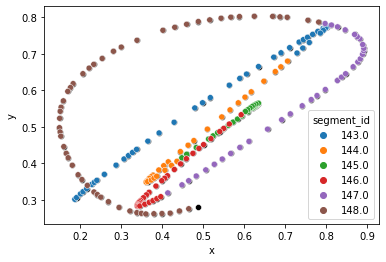

In [35]:
sns.scatterplot(data=stroke_i, x='x', y='y', color='black')
sns.scatterplot(data=stroke_i_feat, x='x', y='y', hue='segment_id', palette='tab10')

In [36]:
stroke_i_feat.head()

key      t0  ts  stroke_id         x         y         p  \
3718  272926_50  272926  50         19  0.186201  0.301575  0.093409   
3719  272940_60  272940  60         19  0.190601  0.306401  0.113206   
3720  272940_70  272940  70         19  0.200110  0.316406  0.153750   
3721  272956_80  272956  80         19  0.206245  0.322376  0.156946   
3722  272969_90  272969  90         19  0.215098  0.330766  0.162185   

            x_        y_        p_  ...        y0        p0        x1  \
3718  0.003704  0.006134  0.043409  ...  0.000134  0.003737  0.000026   
3719  0.008104  0.010960  0.063206  ...  0.000380  0.007785  0.000066   
3720  0.017612  0.020966  0.103750  ...  0.000876  0.013753  0.000146   
3721  0.023748  0.026936  0.106946  ...  0.001748  0.021501  0.000291   
3722  0.032601  0.035325  0.112185  ...  0.003162  0.030850  0.000544   

            y1        p1  segment_id         s        da   min_dtw  min_dtw_id  
3718  0.000052  0.001149       143.0  0.000578 -0.027239  1.222192         109  
3719  0.000126  0.002142       143.0  0.001419 -0.027239  1.222192         109  
3720  0.000262  0.003475       143.0  0.002995 -0.027239  1.222192         109  
3721  0.000487  0.005051       143.0  0.005674 -0.034339  1.222192         109  
3722  0.000834  0.006752       143.0  0.009959 -0.039299  1.222192         109  

[5 rows x 21 columns]

<AxesSubplot:xlabel='ts', ylabel='s'>

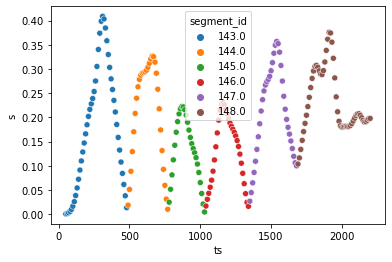

In [37]:
sns.scatterplot(data=stroke_i_feat, x='ts', y='s', hue='segment_id', palette='tab10')

In [38]:
feat_df

key  segment_id         s        da       min_dtw min_dtw_id
0       223155_50           1  0.000063 -0.001177  10000.000000          0
1       223168_60           1  0.000164 -0.001177  10000.000000          0
2       223181_70           1  0.000366 -0.001177  10000.000000          0
3       223181_80           1  0.000719  0.001078  10000.000000          0
4       223194_90           1  0.001273  0.005042  10000.000000          0
...           ...         ...       ...       ...           ...        ...
9378  351362_1220         354  0.387978 -0.009378      3.038591        242
9379  351362_1230         354  0.395820 -0.003661      3.038591        242
9380  351375_1240         354  0.398053  0.002744      3.038591        242
9381  351375_1250         354  0.392254  0.002744      3.038591        242
9382  351395_1260         354  0.377313  0.002744      3.038591        242

[9383 rows x 6 columns]

## check closest neighbours

In [39]:
min_dtw_id = feat_df.groupby('segment_id').first()['min_dtw_id'].values
min_dtw = feat_df.groupby('segment_id').first()['min_dtw'].values

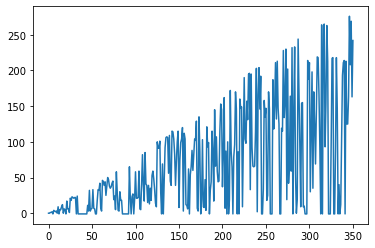

In [40]:
plt.plot(min_dtw_id)

(array([203.,  63.,  17.,   7.,   1.,   1.,   0.,   0.,   0.,   0.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

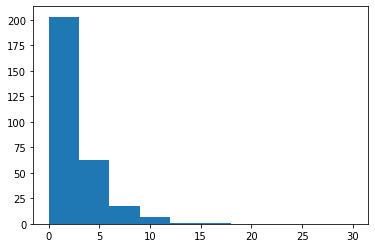

In [41]:
plt.hist(min_dtw, range=(0, 30))

## check data processing

The angle provided by arctan2 is succeptible to wrap around. This can be accomodated with np.unwrap. However, it is currently not implemented in the js code.

In [ ]:
filename = "../data/user/data_25042022_170416.csv"

In [54]:
gi = feat_df.groupby('segment_id').get_group(2)

In [55]:
gi = gi.join(data_df.set_index('key'), on='key').copy()

<AxesSubplot:>

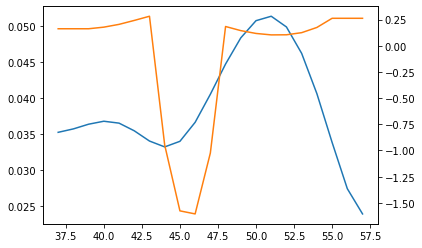

In [56]:
fig, ax = plt.subplots()
gi['s'].plot(ax=ax)
axt = ax.twinx()
gi['da'].plot(ax=axt, c=tab10[1])

In [31]:
wl=7
po=2
savgol_dict = {'window_length':wl, 'polyorder':po, 'mode':'nearest'}

In [32]:
alpha = np.arctan2(gi['y1'], gi['x1'])
da = scsig.savgol_filter(alpha, deriv=1, **savgol_dict)

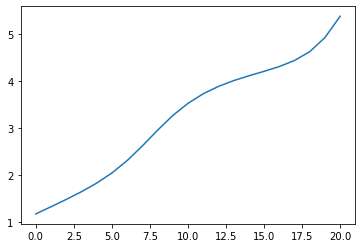

In [33]:
plt.plot(np.unwrap(alpha))

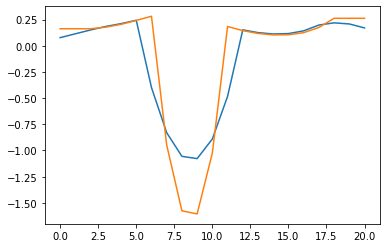

In [34]:
plt.plot(da)
plt.plot(gi['da'].values)

<AxesSubplot:xlabel='x', ylabel='y'>

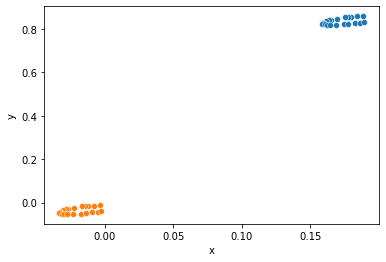

In [35]:
sns.scatterplot(data=gi, x='x', y='y')
sns.scatterplot(data=gi, x='x_', y='y_')

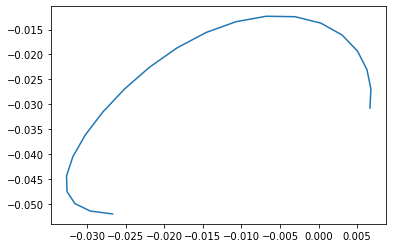

In [36]:
plt.plot(gi['x0'], gi['y0'])

In [37]:
wl=7
po=2
savgol_dict = {'window_length':wl, 'polyorder':po, 'mode':'nearest'}

In [38]:
gi['x1_'] = scsig.savgol_filter(gi['x0'], deriv=1, **savgol_dict)
gi['y1_'] = scsig.savgol_filter(gi['y0'], deriv=1, **savgol_dict)

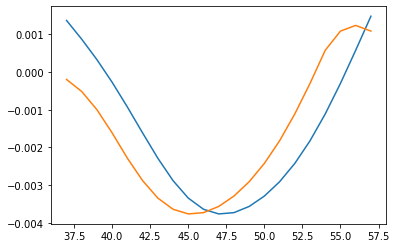

In [39]:
plt.plot(gi['x1'])
plt.plot(gi['x1_'])

In [40]:
s = np.linalg.norm(gi[['x1', 'y1']], axis=1)

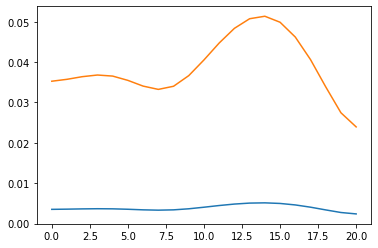

In [41]:
plt.plot(s)
plt.plot(gi['s'].values)

In [42]:
alpha = np.arctan2(gi['y1'], gi['x1'])

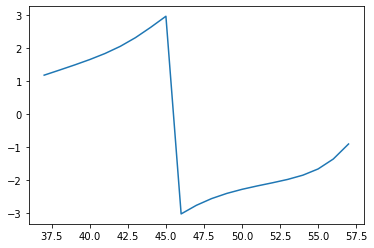

In [43]:
plt.plot(alpha)